# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.1. Download Dataset

In [0]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1vF3FqgBC1Y-RPefeVmY8zetdZG1jmHzT'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('imdb_train.csv')

id = '1XhaV8YMuQeSwozQww8PeyiWMJfia13G6'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('imdb_test.csv')

import pandas as pd
df_train = pd.read_csv("imdb_train.csv")
df_test = pd.read_csv("imdb_test.csv")

reviews_train = df_train['review'].tolist()
sentiments_train = df_train['sentiment'].tolist()
reviews_test = df_test['review'].tolist()
sentiments_test = df_test['sentiment'].tolist()

print("Training set number:",len(reviews_train))
print("Testing set number:",len(reviews_test))

Training set number: 25000
Testing set number: 25000


Please Download these files first.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1Lcc_W9Kq0TeSyn0SmetNw_lGyxVjGjzq'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('word_embedding_model.pt')

id = '1zh4wIrzqAMzQu6CdDYQwm6Q9IeqTKkjz'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Character_embedding_model.pt')

id = '1PLm_PmqOW9ZWApSHZc7dWWAxjEApgEw3'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('reviews_train_le.json')

id = '18wQ2eL4hV4pk_w-opr0VnSuRjuUTsrMt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('reviews_test_le.json')

id = '1xkoM3UbrsHfXfWbHV1ZecvN3X5x7azXM'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('sentiments_train.json')

id = '1VWGtOrMMrN71-VA2joHvpCHTxDio5gi6'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('sentiments_test.json')

id = '11ytOEc8zMz82_fe92FMEVBcKzCqfxKdV'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Sequence_model.pt')


## 1.2. Preprocess data

Data preprocessing is really important in NLP tasks, especially for large datasets. Efficient data preprocess can keep important points and information to make the machine understand the data better. In this task, there are 50,000 reviews of the movies from IMDB, 25,000 of them are in the training set and the other 25,000 are in the testing set. Each review contains lots of words which may be composed of numeric characters and unusual symbols. We need to deal with them to make them cleaner, more accurate, and universal. In this section, multiple data preprocessing methods are applied to gain a cleaner dataset for further implementations. 
</br>
</br>
#### Case Folding
Since the same word with different cases may be regarded as different words, such as “Me” and “me”, we need to change all words in their lowercases. Then the same word will be seen as the same.
</br>
</br>
#### Remove <label>
Some of the reviews data contain HTML labels such as </br>, but these labels have no actual meanings and will make the data noisy. Therefore, I delete all the labels.
</br>
</br>
#### Remove punctuation
Punctuations in the data do not add any additional information, I delete them to decrease the data size.
</br>
</br>
#### Tokenization
I do the tokenization after removing punctuations otherwise the punctuations would also be tokenized. After tokenizing, the text will be split into “words”, each word is a token. 
</br>
</br>
#### Remove stopwords
Stopwords contain the most frequently used words such as “is”, “our”, “of”. However, these words may not add any additional meanings or useful information and maybe not helpful for us to analyze the data. Therefore I delete them to reduce the size of the dataset. 
</br>
</br>
#### Lemmatization
Since the dataset contains lots of reviews from the internet, we need to do lemmatization to restore the general meaning of the word. By doing the lemmatization, words can be restored to general forms that can express the complete semantics and can be analyzed better. I did not do Stemming since it cannot express the complete semantics, just restore words to their roots. But sometimes, words with totally different meanings would be replaced by the same root word. Therefore we only did Lemmatization whose replaced words are more meaningful, complete, and effective.
</br>
</br>
#### Label Encoding
To preprocess the label data, the labels as 0 for “negative”  and 1 for “positive”.
</br>
</br>



Please **Do Not** run this code, or you will take a long time. I have stored the json data in the following code section.

In [0]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

#Lowercase
reviews_train = [i.lower() for i in reviews_train]
reviews_test = [i.lower() for i in reviews_test]

#Remove html labels such as </br>
def remove_br_labels(x):
  remove_label = re.compile('<.*?>')
  x = re.sub(remove_label,'', x)
  return x
reviews_train = [remove_br_labels(i) for i in reviews_train]
reviews_test = [remove_br_labels(i) for i in reviews_test]

#Remove punctuation
def remove_punctuation_re(x):
  x = re.sub(r'[^\w\s]','', x)
  return x
reviews_train = [remove_punctuation_re(i) for i in reviews_train]
reviews_test = [remove_punctuation_re(i) for i in reviews_test]

#Tokenisation
reviews_train = [word_tokenize(i) for i in reviews_train]
reviews_test = [word_tokenize(i) for i in reviews_test]

#Stopwords Removal
stopwords = sw.words()
reviews_train_ns=[]
for tokens in reviews_train:
  filtered_sentence = [w for w in tokens if not w in stopwords]
  reviews_train_ns.append(filtered_sentence)

reviews_test_ns=[]
for tokens in reviews_test:
  filtered_sentence = [w for w in tokens if not w in stopwords]
  reviews_test_ns.append(filtered_sentence)

#Lemmatisation
lemmatizer = WordNetLemmatizer()
reviews_train_le=[]
for tokens in reviews_train_ns:
  lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens]
  reviews_train_le.append(lemma_sentence)

reviews_test_le=[]
for tokens in reviews_test_ns:
  lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens]
  reviews_test_le.append(lemma_sentence)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Please Do Not run this

In [0]:
import json
import torch
json.dump(reviews_train_le, open('reviews_train_le.json', 'w'))
json.dump(reviews_test_le, open('reviews_test_le.json', 'w'))
json.dump(sentiments_train, open('sentiments_train.json', 'w'))
json.dump(sentiments_test, open('sentiments_test.json', 'w'))

Please run this saved dataset, it will save lots of time.

In [0]:
import json

reviews_train_le = json.load(open('reviews_train_le.json'))
reviews_test_le = json.load(open('reviews_test_le.json'))
sentiments_train = json.load(open('sentiments_train.json'))
sentiments_test = json.load(open('sentiments_test.json'))

**Label Encoding**

In [2]:

from sklearn.preprocessing import LabelEncoder
import numpy as np
labels = np.unique(sentiments_train)
lEnc = LabelEncoder()
lEnc.fit(labels)
sentiments_train_n = lEnc.transform(sentiments_train)
sentiments_test_n = lEnc.transform(sentiments_test)
numClass = len(labels)

print(labels)
print(lEnc.transform(labels))

['neg' 'pos']
[0 1]


In [0]:
print(reviews_train_le[0])

['enjoyed', 'movie', 'havent', 'seen', 'andy', 'griffith', 'age', 'felt', 'fit', 'role', 'perfectly', 'ive', 'associated', 'comedy', 'pleased', 'see', 'he', 'versatilei', 'wasnt', 'troubled', 'dottys', 'anxiety', 'disorder', 'may', 'verbatim', 'psychiatric', 'textbook', 'zillion', 'whateverphobias', 'neurosis', 'broad', 'variety', 'quantitative', 'qualitative', 'form', 'clearly', 'sensitive', 'extrasensory', 'power', 'understood', 'local', 'indian', 'anglos', 'surprising', 'character', 'vulnerable', 'nominally', 'eccentricalthough', 'taken', 'light', 'family', 'movie', 'actually', 'sophisticated', 'seems', 'hirams', 'twist', 'came', 'pleasant', 'surprise', 'tied', 'preceding', 'action', 'together', 'bundle', 'fun', 'contemplate', 'possibility', 'spiritual', 'guidance']


# 2 - Model Implementation

## 2.1. Word Embeddings

In the word embedding model, **Word2Vec with SkipGram** is implemented. 

Although the FastText model always performs faster, it is not suitable to deal with complex tasks. Our task is to predict the sentiment of the reviews, which needs to analyze the meaning of the sequence. Therefore I choose Word2Vec, which can consider the context more.

To get the word vector, CBOW model and SkipGram model are both frequently used. Both of them try to construct a fake task, which focuses more on the intermediates than the final results. CBOW uses context words to predict the target word (center word). On the contrary, SkipGram uses the target word to predict its context words. Because of their working principles, CBOW slides the window once for each training session to get a training sample, while SkipGram slides the center word window once to get multiple training samples. I compare the word frequency (how many times a word in our corpus) with different limitation numbers such as the average frequency, the counts of frequency and max frequency as well as the frequency which is less than 5, 10, 15, and 20. From the figure of “the rate of words that are less frequent than limits”, we can see that most of the tokens in the dataset appear less than 20 times. There are 5,806,190 words in our dataset after the preprocessing step of section 1. Therefore our corpus contains lots of unique words with a large number of 210,286. Therefore SkipGram is applied in our model to make the word vectors more accurate. The window size is set to 2. Each target word (center word) has 2 words before and 2 words after as its context words.  SkipGram can have better performance. 


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# we will delete the word which appears less than 10 times
# Build a list that contains all reviews both in training set and the testing set
total_reviews = []
for each_review in reviews_train_le:
  total_reviews.append(each_review)
for each_review in reviews_test_le:
  total_reviews.append(each_review)
print(len(total_reviews))

# The total number of words in the reviews (include repeating words)
total_word_number = 0
for review in total_reviews:
  for word in review:
    total_word_number += 1
print(total_word_number)

# Build a dictionary of all words appear in the reviews of both training set and testing set
# The dictionary's key is the word, the value is the times that each word appears
total_words = {}
# Build a list that records the times that each unique word appears in the reviews
total_word_counts = []
for each_review in total_reviews:
  for each_word in each_review:
    default_value = 0
    total_words[each_word] = 1 + total_words.get(each_word, default_value)
# the total number of the unique words
print(len(total_words))

50000
5806190
210286


Most Frequent Word Counts: 98938
[1, 5, 10, 15, 20, 27.61092036559733]
[0.0, 0.8143956326146295, 0.8751509848492054, 0.9007304337901715, 0.915981092416994, 0.9315123213147808]


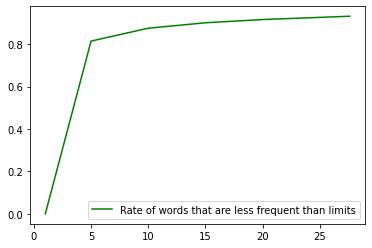

In [4]:
for each_word in total_words:
  word_count = total_words.get(each_word)
  total_word_counts.append(word_count)

word_most_times = max(total_word_counts)
print('Most Frequent Word Counts: '+ str(word_most_times))
word_mean_times = np.mean(total_word_counts)
word_counts_times = np.bincount(total_word_counts)
word_counts_times = np.argmax(word_counts_times) 
count_less_than_mean = 0
count_less_than_counts = 0
count_less_than_5 = 0
count_less_than_10 = 0
count_less_than_15 = 0
count_less_than_20 = 0

for word_times in total_word_counts:
  if word_times < word_mean_times:
    count_less_than_mean += 1
  if word_times < word_counts_times:
    count_less_than_counts += 1
  if word_times < 5:
    count_less_than_5 += 1
  if word_times < 10:
    count_less_than_10 += 1
  if word_times < 15:
    count_less_than_15 += 1
  if word_times < 20:
    count_less_than_20 += 1

count_of_words = [word_counts_times, 5, 10, 15, 20, word_mean_times]
rate_of_word_frequent = [count_less_than_counts/len(total_words), count_less_than_5/len(total_words), count_less_than_10/len(total_words), count_less_than_15/len(total_words), count_less_than_20/len(total_words), count_less_than_mean/len(total_words)]
print(count_of_words)
print(rate_of_word_frequent)
plt.plot(count_of_words, rate_of_word_frequent, 'g', label = 'Rate of words that are less frequent than limits')
plt.legend()
plt.show()


### 2.1.1. Data Preprocessing for Word Embeddings

The dataset of this task is really large, and since it contains 50,000 reviews on the internet typed by different people, some of the words are really rare and not easy to understand. From the above figure, we can see that the average frequency of all words is 27.6. I preprocess the data by deleting the unique words that appear less than 10 times to reduce the rare words and make the dataset cleaner. It will be helpful for us to learn from frequent words and their context words for further implementations.

The preprocessed data from the training set is applied in this word embedding model. In total, there are 25,000 reviews and 48,012 unique words. 


In [0]:
for each_review in reviews_train_le:
  for each_word in each_review:
    if total_words.get(each_word) < 10:
      each_review.remove(each_word)

for each_review in reviews_test_le:
  for each_word in each_review:
    if total_words.get(each_word) < 10:
      each_review.remove(each_word)
  
review_train_word_preprocess = []
for i in reviews_train_le:
  review_train_word_preprocess.append(i)

review_test_word_preprocess = []
for i in reviews_test_le:
  review_test_word_preprocess.append(i)

In [5]:
print(len(review_train_word_preprocess))
print(len(review_test_word_preprocess))

25000
25000


In [5]:
# Only keep the unique words which appear more than 10 times in the reviews dataset
# Use .sort() to make the order same
word_sequence = []
for each_review in review_train_word_preprocess:
  for each_word in each_review:
    word_sequence.append(each_word)
for each_review in review_test_word_preprocess:
  for each_word in each_review:
    word_sequence.append(each_word)

print(len(word_sequence))

word_list= list(set(word_sequence))
word_list.sort()

# Build a dictionary for the unique words, the key is each unique word, the value of each key is the index number
word_dict = {w: i for i, w in enumerate(word_list)}

# Build Skip-Gram model with window size = 2
skip_grams = []
for i in range(2, len(word_sequence) - 2):
    # Since the window size is 2, we need to analyse the target word (center word) with each of the two words before and two words after it.
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i - 2]], word_dict[word_sequence[i + 1]], word_dict[word_sequence[i + 2]]]

    # skipgrams: (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])

print(len(word_dict))   
print(skip_grams[0]) 
print(len(skip_grams)) 
# there are 48012 unique words in 
voc_size = len(word_list)
print(voc_size)


5519975
48012
[19264, 28347]
22079884
48012


In [6]:
voc_size = len(word_list)
print(voc_size)
# prepare random batch from skip-gram - we do not have enought data so we randomly select data
def prepare_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        input_temp = [0]*voc_size
        input_temp[data[i][0]] = 1
        random_inputs.append(input_temp)  # target
        random_labels.append(data[i][1])  # context word

    return np.array(random_inputs), np.array(random_labels)

48012


### 2.1.2. Build Word Embeddings Model

The selected hyperparameters and the explanations are listed as follows.

#### Learning rate = 0.01 
A small learning rate may cause the loss to decrease and converge very slowly, while a large learning rate will make bigger updates, and the loss may reach the local minimum or even explode. Therefore the learning rate should not be too small or too big. For training the word embedding model, I first set the learning rate to be 0.001, but the loss decreases very slowly, then I set the learning rate to 0.01, and the loss decreases continuously. 
</br>
</br>
#### Batch size = 1024
Since both the CPU and GPU memory are stored in binary, it makes sense to set the batch size to a power of 2. For the reason that our task aims to predict the sentiment to be negative or positive, I prefer to select a batch size that is not small for gaining a better representation of the training samples. Moreover, within a reasonable range, the memory utilization can be increased, the parallelization efficiency can be improved. Additionally, the number of iterations that need to complete an epoch can be reduced. I have tried 512, 1024, and 2048, when batch size is 1,024, the loss improves (decreases) the best. Hence, I select 1024 to be the batch size.
</br>
</br>
#### Embedding Size = 100
Larger embedding size may not damage the performance of the model itself.
</br>
</br>
#### Number of epochs = 200
First, I tried the total epoch number of 500, but then I found that the loss even does not decrease continuously when the epoch of a large number. Then I tried 200, and it performed well and fast. Therefore the dataset is trained for 200 epochs. After 200 epochs, the loss decreases from 10.7599 to 8.4932.
</br>
</br>
#### Shown interval = 10
The loss value and its corresponding epoch is shown by every 10 epochs.
</br>
</br>

In [0]:
# Please comment your code
#hyperparameters
learning_rate = 0.01
batch_size = 1024
embedding_size = 100
no_of_epochs = 200
word_epoch_interval = 10


#### Word Embedding Model
As I mentioned before, Word2Vec-SkipGram is applied to be the word embedding model. Since the dataset contains many unique or rare words, and for the purpose of predicting the context words better. Here I set the window size of skip-gram to be 2. Both the 2 words before and after each target word will be seen as its context. If the size is 1, it may be hard to analyze the word and make a prediction, if the size is too big, it will make the model too complex. Finally, I select 2, which is also a commonly used window size for the implementation of skip-gram models.






In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import matplotlib
import matplotlib.pyplot as plt

class SkipGram(nn.Module):
    def __init__(self):
        super(SkipGram, self).__init__()
        self.linear1 = nn.Linear(voc_size, embedding_size, bias=False)
        self.linear2 = nn.Linear(embedding_size, voc_size, bias=False)

    def forward(self, x):
        hidden = self.linear1(x)
        out = self.linear2(hidden)
        return out

skip_gram_model = SkipGram().to(device)
criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(skip_gram_model.parameters(), lr=learning_rate)

epochs = []
loss_values = []

### 2.1.3. Train Word Embeddings Model

The following graph shows the loss values among different epochs. We can see that the loss decreases (improves) rapidly and sharply at the beginning, and then decreases slowly with fluctuations after epoch 100. Finally become eventually stable. The loss improves (decreases) from 10.7599 to 8.4932.
Among these shown epochs, epoch 180 has the lowest loss of 8.4867.

Epoch: 10, loss: 10.7599
Epoch: 20, loss: 10.4262
Epoch: 30, loss: 9.5815
Epoch: 40, loss: 9.0385
Epoch: 50, loss: 9.0107
Epoch: 60, loss: 8.9329
Epoch: 70, loss: 8.7545
Epoch: 80, loss: 8.8311
Epoch: 90, loss: 8.6862
Epoch: 100, loss: 8.6499
Epoch: 110, loss: 8.6167
Epoch: 120, loss: 8.7806
Epoch: 130, loss: 8.7042
Epoch: 140, loss: 8.6294
Epoch: 150, loss: 8.6542
Epoch: 160, loss: 8.6851
Epoch: 170, loss: 8.6278
Epoch: 180, loss: 8.4867
Epoch: 190, loss: 8.5558
Epoch: 200, loss: 8.4932
Finished Training Word Embedding Model


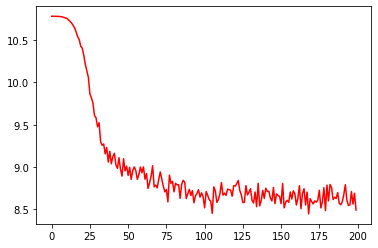

In [0]:
for epoch in range(no_of_epochs):

    inputs, word_emb_labels = prepare_batch(skip_grams, batch_size)
    inputs_torch = torch.from_numpy(inputs).float().to(device)
    labels_torch = torch.from_numpy(word_emb_labels).to(device)
 
    # 1. zero grad
    skip_gram_model.train()
    optimiser.zero_grad()

    # 2. forword propagation
    outputs = skip_gram_model(inputs_torch)

    # 3. calculate loss
    loss = criterion(outputs, labels_torch)
    # 4. back propagation
    #compute gradients
    loss.backward()
    optimiser.step()
    
    epochs.append(epoch)
    loss_values.append(loss)
   
    if epoch % word_epoch_interval == word_epoch_interval - 1: 
       print('Epoch: %d, loss: %.4f' %(epoch + 1, loss))
       
print('Finished Training Word Embedding Model')
plt.plot(epochs, loss_values, 'r', label = 'Training Loss of Word Embedding Model')
plt.show()

### 2.1.4. Save Word Embeddings Model

In [0]:
# Save the word embedding model
torch.save(skip_gram_model, 'word_embedding_model.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type SkipGram. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### 2.1.5. Load Word Embeddings Model

In [9]:
# Please run this code section to load the word embedding model
import torch
word_embedding_model = torch.load('word_embedding_model.pt')
word_embedding_model.eval()

SkipGram(
  (linear1): Linear(in_features=48012, out_features=100, bias=False)
  (linear2): Linear(in_features=100, out_features=48012, bias=False)
)


The words are embedded in vectors to present their meanings. I create a dictionary for store them better, the key of the word embedding dictionary is the words in the word list, and the value of the word is the word embeddings of the corresponding word.

In [10]:
weight_of_sg = word_embedding_model.linear1.weight
print(weight_of_sg.shape)
trained_word_embeddings = weight_of_sg.detach().T.numpy()
print(trained_word_embeddings.shape)

torch.Size([100, 48012])
(48012, 100)


In [11]:
# The key is the word, the value is the word embedding
word_embeddings_dic = {}
for i in range(len(word_list)):
  word_embeddings_dic[word_list[i]] = trained_word_embeddings[i].tolist()
print(len(word_embeddings_dic))

48012


## 2.2. Character Embeddings

### 2.2.1. Data Preprocessing for Character Embeddings

The following figure represents the rate of the words whose character lengths are shorter than the set limitation values such as the average length, the counts of length, length of 10, length of 15, and length of the double average. The longest word has a character length of 72, which is really long and will cost much more training time. The average length of all words in the dataset is 7.88, and the counts of the length is 7, which is similar to the average value. The double average value is 15.76. Since the length of a word must be an integer, therefore the double average value should be represented by 16. </br>

From the figure, we can observe that more than 95% of the words are within the length limitation of 16, which can cover most of the words. Therefore I finally set the word length limitation to be 16. Then I do the preprocessing method of adding paddings to the words. For the words that are longer than 16, we will only keep its first 16 characters, and for the words that are shorter than 16, we will add paddings “?” to the words to keep all words with the same length. 


72
7.881904523869033
7
15.763809047738066
[0.3592643505790219, 0.5088519536782471, 0.7510830625676914, 0.9697992168624511, 0.9800674831292177]


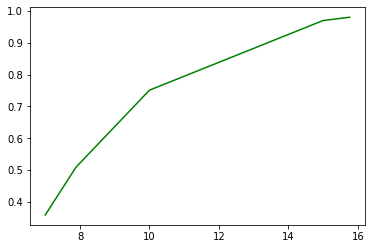

In [0]:
import matplotlib
import matplotlib.pyplot as plt

word_lengths = []

for each_word in word_list:
  length_of_word = len(each_word)
  word_lengths.append(length_of_word)

length_of_longest = max(word_lengths)
average_length = np.mean(word_lengths)
counts = np.bincount(word_lengths)
counts = np.argmax(counts)
double_mean = 2*average_length
print(length_of_longest)
print(average_length)
print(counts)
print(double_mean)
words_shorter_than_mean = 0
words_shorter_than_counts = 0
words_shorter_than_10 = 0
words_shorter_than_15 = 0
words_shorter_than_double_mean = 0


for each_length in word_lengths:
  if each_length < average_length:
    words_shorter_than_mean += 1
  if each_length < counts:
    words_shorter_than_counts += 1
  if each_length < 10:
    words_shorter_than_10 += 1
  if each_length < 15:
    words_shorter_than_15 += 1
  if each_length < double_mean:
    words_shorter_than_double_mean += 1
 
limits = [counts, average_length, 10, 15, double_mean]
rate_of_word_shorter_than_limit = [words_shorter_than_counts/voc_size, words_shorter_than_mean/voc_size, words_shorter_than_10/voc_size, words_shorter_than_15/voc_size, words_shorter_than_double_mean/voc_size]
print(rate_of_word_shorter_than_limit)
plt.plot(limits, rate_of_word_shorter_than_limit, 'g', label = 'Rate of words that are shorter than limit')
plt.show()
  


In [12]:
# Select a length for each word
word_len_limit = 16

def add_padding(corpus, word_len_limit):
    output = []
    for word in corpus:
        if len(word) > word_len_limit:
            output.append(word[:word_len_limit])
        else:
            for j in range(word_len_limit - len(word)):
                word +="?"
            output.append(word)
    return output

words_pad = add_padding(word_list, word_len_limit)
print(len(words_pad))

48012


Since for developing the character embedding model, we need to use the one-hot vector to represent each word, therefore it is better for us to make the length of words to be the same for process the dataset better. 

First, the lengths of words are kept the same with length 16 by removing additional characters if words are longer than16 or by adding character padding of “?”. 

Second, I store all unique characters to a list. There are 77 unique characters in total.

Third, I build a character dictionary which records the character and its index representations. The key is each unique character, and the value is the index number of the character.

Fourth, I convert each character in each word to the index which is stored in the character dictionary.
Fifth, I convert the index-represented characters to their one-hot vectors. 

Finally, I used the word embeddings dictionary which is created in the previous section to gain the word embeddings of each word. Therefore, the input batch is the word in the format of one-hot vector and the target batch is the word embedding of the corresponding word.


In [13]:
# Please comment your code
import numpy as np
print(len(words_pad))
print(len(words_pad[0]))
# Build a list to store all characters in the reviews
chars = []
for each_word in words_pad:
  for each_char in each_word:
    chars.append(each_char)

char_list = list(set(chars))
char_list.sort()
print(char_list)

# one-hot encoding and decoding 
# {'a': 0, 'b': 1, 'c': 2, ..., 'j': 9, 'k', 10, ...}
# Build a dictionary for the unique characters, the key is each unique character, the value of each key is the index number
num_dic = {n: i for i, n in enumerate(char_list)}
dic_len = len(num_dic)
print(num_dic)
# There are 77 characters in total (76 char + padding '?')
print(dic_len)

# Make a batch to have sequence data for input and ouput
# The input is each character in each word
# The target is the embedding of the word that the character from. The pre-trained word embeddings are from the word embedding model in section 2.1

# First, we need to create a dictionary of the words and their pre-trained word embeddings
# We already got trained_word_embeddings in section 2.1.3. 
# In this word_embeddings_dic dictionary, the key is the word, the value is the trained_word_embedding value of the word


def make_batch(seq_data):
  input_batch = []
  target_batch = []
  search_index = 0
  for each_word in seq_data:
    inputdata = []
    for each_char in each_word:
      inputdata.append(num_dic[each_char]) # get the value of num_dic, which is the index number
      # for the target, we need to search the embedding of the word in the word embedding model

      # convert input to one-hot encoding.   generate the input
      # if input is [3, 4, 4]:
      # [[ 0,  0,  0,  1,  0,  0,  0, ... 0]
      #  [ 0,  0,  0,  0,  1,  0,  0, ... 0]
      #  [ 0,  0,  0,  0,  1,  0,  0, ... 0]]
    onehot = np.eye(dic_len)[inputdata]
    input_batch.append(onehot)

    for index, word_of_index in enumerate(seq_data):
      if word_of_index == each_word:
        search_index = index
    target_word = word_list[search_index]  # get the word
    target_embedding = word_embeddings_dic.get(target_word) # get the word embedding
    # target_embedding = target_embedding
    target_batch.append(target_embedding)
  return input_batch, target_batch

48012
16
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '³', '½', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ğ', 'ו', 'כ', 'מ', 'ן', 'ר']
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '?': 10, '_': 11, 'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19, 'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27, 'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'z': 37, '³': 38, '½': 39, 'ß': 40, 'à': 41, 'á': 42, 'â': 43, 'ã': 44, 'ä': 45, 'å': 46, 'æ': 47, 'ç': 48, 'è': 49, 'é': 50, 'ê': 51, 'ë': 52, 'ì': 53, 'í': 54, 'î': 55, 'ï': 56, 'ð': 57, 'ñ': 58, 'ò': 59, 'ó': 60, 'ô': 61, 'õ': 62, 'ö': 63, 'ø': 64, 'ù': 65, 'ú': 66, 'û': 67, 'ü

### 2.2.2. Build Character Embeddings Model

The selected hyperparameters and the explanations are listed as follows.

#### Learning rate = 0.1
First, I tried to use the learning rate of 0.01, but the loss became extremely small. Then I tried to use a learning rate of  0.1, and the character embedding model works better.
</br>
</br>
#### Number of hidden nodes = Embedding size/2 = 50
Based on the working principle of the word embedding model and word based character embedding model, the embeddings are as the input of RNN, therefore  the number of the hidden nodes has to be the same with the embedding size. As in the linear layer of Bi-LSTM contains 2*hidden nodes, the number of hidden nodes here is selected to be Embedding size/2, which is 50.
</br>
</br>
#### Epoch number: 50
I tried the epoch = 100 at first, but epoch = 50 performs better and faster.
</br>
</br>
#### Batch size = 1024
Since both the CPU and GPU memory are stored in binary, it makes sense to set the batch size to a power of 2. For the reason that our task aims to predict the sentiment to be negative or positive, I prefer to select a batch size that is not small for gaining a better representation of the training samples. Moreover, within a reasonable range, the memory utilization can be increased, the parallelization efficiency can be improved. Additionally, the number of iterations that need to complete an epoch can be reduced. I have tried 512, 1024, and 2048, when batch size is 1,024, the loss improves (decreases) the best. Hence, I select 1024 to be the batch size.
</br>
</br>
#### Number of sequences for RNN is 3
</br>
</br>
#### Number of inputs: 77
The number of inputs should be the same as the dimension of input vector, which is 77.
</br>
</br>
#### Number of Classes: 100
The number of classes should be the same as the embedding size.
</br>
</br>
#### Shown epoch interval = 2
Print the loss value and its corresponding epoch with an interval of 2.



In [14]:
# Please comment your code

#Hyperparameter Selection
learning_rate_of_char = 0.1
n_hidden_of_char = 50
total_epoch_of_char = 50
# total_epoch_of_char = 100
char_batch = 1024
# Number of sequences for RNN
n_step = 3
# number of inputs (dimension of input vector) = 77
n_input = dic_len
# number of classes = 100
n_class = 100
char_epoch_interval = 2
print(n_input)

77


For the character embedding model, I used **Bi-LSTM**, which contains bi-directions long short term memory. It can be seen as putting two RNN together in one model. Since the bi-directional structure, enables us to gain the forward and backward at each update. Therefore Bi-LSTM can get use of the context words better than other RNNs since it can get information from two directions. For this task, we really need to use Bi-LSTM to analyze the semantics of the reviews better.

Here for calculating the loss, I use the Mean Squared Error loss function (MSE), which is very popular for loss computation. It can estimate the average of the squared errors. It is a non-zero number and can see the distance between the predicted result with the ground truth. For the optimation function, I use Adam here, which has the best performance.

In [15]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

# We use Bi-LSTM here
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lstm = nn.LSTM(n_input, n_hidden_of_char, batch_first =True, bidirectional=True, dropout=0.2)
        self.linear = nn.Linear(n_hidden_of_char*2, n_class)

    def forward(self, sentence):
        
        #h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        lstm_out, (h_n,c_n) = self.lstm(sentence)
        #concat the last hidden state from two direction
        hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z, hidden_out

# Move the model to GPU
char_model = Net().to(device)
# Loss function and optimizer
criterion_of_char = nn.MSELoss()
optimizer_of_char = optim.Adam(char_model.parameters(), lr=learning_rate_of_char)

# Preparing input
#input_batch_of_char_model contains the chars in each word, target_batch_of_char_model contains embeddings of each word



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [16]:
input_batch_of_char_model, target_batch_of_char_model = make_batch(words_pad)
print(len(input_batch_of_char_model))
print(len(target_batch_of_char_model))

total_data_num = len(words_pad)  #48012
print(total_data_num)

48012
48012
48012


For the purpose of running all data samples, I also write a create_mini_batches function to make batches of the inputs and targets.


In [0]:
import matplotlib
import matplotlib.pyplot as plt

def create_mini_batches(inputs, targets, mini_batch_size, iterator_num):
  num_iterations = int(total_data_num/mini_batch_size) + 1  # 46+1=47
  batch_inputs = []
  batch_targets = []

  if iterator_num >=0 and iterator_num <= int(total_data_num/mini_batch_size)-1:
    from_index = iterator_num * mini_batch_size
    to_index = (iterator_num + 1) * mini_batch_size - 1

  else:
    from_index = iterator_num * mini_batch_size 
    to_index = total_data_num - 1

  for index in range(from_index, to_index+1):
    batch_inputs.append(inputs[index])
    batch_targets.append(targets[index])
  
  return batch_inputs, batch_targets

char_epochs = []
char_loss_values = []

The loss graph represents the average loss of each iterator among different epochs. From the following graph, we can see that the loss of the training set decreases sharply at the beginning, then increases from epoch 5 to 10, and then decreases sharply until it hold steady in the end. 

Start Training Epoch: 0
Iteration: 0, loss: 0.45988216
Finish Training Epoch: 0
=================================================<3
Start Training Epoch: 1
Iteration: 0, loss: 0.01541835
Finish Training Epoch: 1
=================================================<3
Start Training Epoch: 2
Iteration: 0, loss: 0.00566944
Finish Training Epoch: 2
=================================================<3
Start Training Epoch: 3
Iteration: 0, loss: 0.00459095
Finish Training Epoch: 3
=================================================<3
Start Training Epoch: 4
Iteration: 0, loss: 0.00927267
Finish Training Epoch: 4
=================================================<3
Start Training Epoch: 5
Iteration: 0, loss: 0.05567989
Finish Training Epoch: 5
=================================================<3
Start Training Epoch: 6
Iteration: 0, loss: 0.11461021
Finish Training Epoch: 6
=================================================<3
Start Training Epoch: 7
Iteration: 0, loss: 0.32002219
Finish Training Epoch

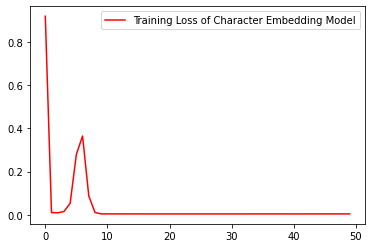

In [0]:
for epoch in range(total_epoch_of_char): 
  print('Start Training Epoch: %d' %(epoch))
  # i is the iterator number (0, 46), 47 iterators in total
  char_epochs.append(epoch)
 
  total_loss_value = 0
  for iteration in range(0, int(total_data_num/char_batch)+1):  
    input_batch_of_char_model_update, target_batch_of_char_model_update = create_mini_batches(input_batch_of_char_model, target_batch_of_char_model, char_batch, iteration)
    input_batch_of_char_torch = torch.from_numpy(np.array(input_batch_of_char_model_update)).float().to(device)
    target_batch_of_char_torch = torch.from_numpy(np.array(target_batch_of_char_model_update)).to(device)
    target_batch_of_char_torch = target_batch_of_char_torch.type(torch.DoubleTensor)
    # Set the flag to training
    char_model.train()
    # forward + backward + optimize
    outputs,_ = char_model(input_batch_of_char_torch)
    outputs = outputs.type(torch.DoubleTensor)
    loss_of_char_model = criterion_of_char(outputs, target_batch_of_char_torch)
    loss_of_char_model.backward()
    optimizer_of_char.step()
    optimizer_of_char.zero_grad()

    # Set the flag to evaluation, which will 'turn off' the dropout
    char_model.eval()
    outputs,_ = char_model(input_batch_of_char_torch) 
  
    # Evaluation loss and accuracy calculation
    loss_of_char_model = criterion_of_char(outputs, target_batch_of_char_torch)
    _, predicted = torch.max(outputs, 1)
    if iteration == 0:
      print('Iteration: %d, loss: %.8f' %(iteration, loss_of_char_model.item()))

    total_loss_value += loss_of_char_model.item()
    if iteration == int(total_data_num/char_batch):
       #total/47
      char_loss_values.append(total_loss_value/(int(total_data_num/char_batch)+1))
      
  print('Finish Training Epoch: %d' %(epoch))
  print('=================================================<3')
print('Finished Character Embedding Training')

plt.plot(char_epochs, char_loss_values, 'r', label = 'Training Loss of Character Embedding Model')
plt.legend()
plt.show()

### 2.1.4. Train Character Embeddings Model

### 2.1.5. Save Character Embeddings Model

In [0]:
# Save the Character embedding model
torch.save(char_model, 'Character_embedding_model.pt')


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### 2.1.6. Load Character Embeddings Model

In [18]:
# Please run this code to download the character embedding model
character_embedding_model = torch.load('Character_embedding_model.pt').to(device)
character_embedding_model.eval()

Net(
  (lstm): LSTM(77, 50, batch_first=True, dropout=0.2, bidirectional=True)
  (linear): Linear(in_features=100, out_features=100, bias=True)
)

The hidden layer of the character embedding model is used to compute the character embeddings.
Then I create a dictionary to store the embeddings. The key is the word, the value of each key is the character embedding vectors.



In [20]:
trained_char_embeddings = []
for each_word in input_batch_of_char_model:
  _, hidden_state = character_embedding_model(torch.from_numpy(np.array([each_word])).float().to(device))
  trained_char_embeddings.append(hidden_state.detach().numpy())

print(len(trained_char_embeddings))

48012


In [21]:
# The key is the word, the value is the character embedding
char_embeddings_dic = {}

for i in range(len(word_list)):
  char_embeddings_dic[word_list[i]] = trained_char_embeddings[i][0].tolist()

print(len(char_embeddings_dic))

48012


In [0]:
import json
json.dump(char_embeddings_dic, open('char_embeddings_dic.json', 'w'))

In [0]:
char_embeddings_dic = json.load(open('char_embeddings_dic.json'))

## 2.3. Sequence model

### 2.3.1. Apply/Import Word Embedding and Character Embedding Model

To build a sequence model, I will preprocess the data first. Just as I mentioned in the character embedding, here for the sequence model, it is also useful to add the padding to each sequence for learning and training better and faster. The following graph shows the rate of sequence numbers which are shorter than the limit values such as mean, counts, 100, 130, 160, 200, and 220. For gaining faster training, I decide to use 160 as the sequence length that more than 80% of the data reviews are shorter than 160. It is also larger than the average and counts length.


1286
110.3995
59
220.799
[0.23376, 0.61374, 0.66626, 0.73558, 0.81438, 0.86654, 0.87948, 0.90362]


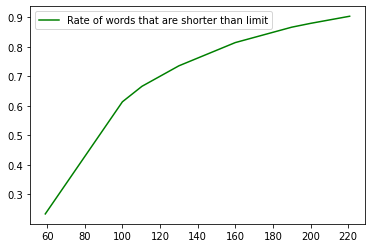

In [0]:
import matplotlib
import matplotlib.pyplot as plt

# Build a list to store the sequence length
sequences_lengths = []
total_reviews_num = 0
for each_review in review_train_word_preprocess:
  sequences_lengths.append(len(each_review))
for each_review in review_test_word_preprocess:
  sequences_lengths.append(len(each_review))

total_num_of_reviews = len(sequences_lengths)
length_of_longest_review = max(sequences_lengths)
average_review_length = np.mean(sequences_lengths)
counts_review = np.bincount(sequences_lengths)
counts_review = np.argmax(counts_review)
double_mean_review = 2 * average_review_length
print(length_of_longest_review)
print(average_review_length)
print(counts_review)
print(double_mean_review)

reviews_shorter_than_mean = 0
reviews_shorter_than_counts = 0
reviews_shorter_than_100 = 0
reviews_shorter_than_130 = 0
reviews_shorter_than_160 = 0
reviews_shorter_than_190 = 0
reviews_shorter_than_200 = 0
reviews_shorter_than_double_mean = 0

for each_length in sequences_lengths:
  if each_length < average_review_length:
    reviews_shorter_than_mean += 1
  if each_length < counts_review:
    reviews_shorter_than_counts += 1
  if each_length < 100:
    reviews_shorter_than_100 += 1
  if each_length < 130:
    reviews_shorter_than_130 += 1
  if each_length < 160:
    reviews_shorter_than_160 += 1
  if each_length < 190:
    reviews_shorter_than_190 += 1
  if each_length < 200:
    reviews_shorter_than_200 += 1
  if each_length < double_mean_review:
    reviews_shorter_than_double_mean += 1
 
limitsnum = [counts_review, 100, average_review_length, 130, 160, 190, 200, double_mean_review]
rate_of_review_shorter_than_limit = [reviews_shorter_than_counts/total_num_of_reviews, reviews_shorter_than_100/total_num_of_reviews, reviews_shorter_than_mean/total_num_of_reviews, reviews_shorter_than_130/total_num_of_reviews, reviews_shorter_than_160/total_num_of_reviews, reviews_shorter_than_190/total_num_of_reviews, reviews_shorter_than_200/total_num_of_reviews, reviews_shorter_than_double_mean/total_num_of_reviews]
print(rate_of_review_shorter_than_limit)
plt.plot(limitsnum, rate_of_review_shorter_than_limit, 'g', label = 'Rate of words that are shorter than limit')
plt.legend()
plt.show()

Then add padding **“<PADDING>”** to each word in the sequence (sentence) if their lengths are less than 160, and keep only 160 words in each review, delete the additional words that extend the limit.
Both reviews in the training and testing dataset will be padded. 


In [20]:
sequence_length = 160

def add_seq_padding(corpus, sequence_length):
  output = []
  for sentence in corpus:
      if len(sentence) > sequence_length:
          output.append(sentence[:sequence_length])
      else:
          for index_of_word in range(sequence_length - len(sentence)):
              sentence.append("<PADDING>")
          output.append(sentence)
  return output

review_train_pad = add_seq_padding(review_train_word_preprocess, sequence_length)
review_test_pad = add_seq_padding(review_test_word_preprocess, sequence_length)
print(len(review_train_pad))
print(review_train_pad[0])

25000
['enjoyed', 'movie', 'havent', 'seen', 'andy', 'griffith', 'age', 'felt', 'fit', 'role', 'perfectly', 'ive', 'associated', 'comedy', 'pleased', 'see', 'he', 'wasnt', 'troubled', 'anxiety', 'disorder', 'may', 'verbatim', 'psychiatric', 'textbook', 'zillion', 'neurosis', 'broad', 'variety', 'qualitative', 'form', 'clearly', 'sensitive', 'power', 'understood', 'local', 'indian', 'surprising', 'character', 'vulnerable', 'nominally', 'taken', 'light', 'family', 'movie', 'actually', 'sophisticated', 'seems', 'twist', 'came', 'pleasant', 'surprise', 'tied', 'preceding', 'action', 'together', 'bundle', 'fun', 'contemplate', 'possibility', 'spiritual', 'guidance', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PADDING>', '<PAD

Next is the most significant step of this task, to apply and import word and character models together. I apply the concatenation function, which combines the word embeddings with the character embeddings to get our final sequence embeddings. I apply this function on both the training sets and the testing sets. The shape of the sequence embeddings should be 3 dimensions.


In [21]:
print(n_hidden_of_char)
word_embeddings_dic['<PADDING>'] = [0]*100
char_embeddings_dic['<PADDING>'] = [0]*100


def get_sequence_emb(corpus, word_embedding_dic, char_embedding_dic):
  seq_emb_list = []
  for each_review in corpus:
    concat_of_word_char = []
    for each_word in each_review:
      #concatation is equal to the sum of word embedding and the character embedding  
      concat_of_word_char.append(word_embedding_dic[each_word] + char_embedding_dic[each_word])
    seq_emb_list.append(concat_of_word_char)  
  return np.array(seq_emb_list)


50


In [0]:
train_seq_embeddings = get_sequence_emb(review_train_pad, word_embeddings_dic, char_embeddings_dic)

In [0]:
test_seq_embeddings = get_sequence_emb(review_test_pad, word_embeddings_dic, char_embeddings_dic)

In [25]:
print(train_seq_embeddings.shape)
print(test_seq_embeddings.shape)

(25000, 160, 200)
(25000, 160, 200)


### 2.3.2. Build Sequence Model

The selected hyperparameters and the explanations are listed as follows.

#### Sequence input number: 200
The input number of the sequence has to be the same shape with the sequence embedding inputs. Therefore the value is 200.
</br>
</br>
#### Sequence class number: 2
Since the sequence model is “Many to 1”, the output should be the prediction result, therefore it is equal to the number of classes. Since there are only two types of labels, one is negative, the other is positive, the number of sequence class should be 2.
</br>
</br>
#### Sequence hidden number:
I tried 516 for the first time, but the RAM crashes. Then I tried 128 and gain good performance.
</br>
</br>
#### Sequence batch size:
Since both the CPU and GPU memory are stored in binary, it makes sense to set the batch size to a power of 2. For the reason that our task aims to predict the sentiment to be negative or positive, I prefer to select a batch size that is not small for gaining a better representation of the training samples. Moreover, within a reasonable range, the memory utilization can be increased, the parallelization efficiency can be improved. Additionally, the number of iterations that need to complete an epoch can be reduced. I have tried 51, 1024, and 2048, when batch size is 1,024, the loss improves (decreases) the best. Hence, I select 1024 to be the batch size.
</br>
</br>
#### seq_batch_size = 64
First, I set the batch size to be 1024, 512, but the RAM crashed. 64 performs well.
</br>
</br>
#### total_epoch_of_seq = 1000
The epoch is 1000 in total. This epoch can train more data.
</br>
</br>
#### seq_learning_rate = 0.01
After trying 0.001, 0.01, 0.1, 0.5 and 1, 0.01 performs best.
</br>
</br>
#### Shown interval = 20
print the loss and accuracy value each 20 epochs
</br>
</br>
#### validation_epoch_interval_1 = 50
print the loss and accuracy value each 20 epochs
</br>
</br>
#### total_validation = 25000
I use the test set data to do the validation. So the total data is 25000
</br>
</br>
#### validation_batchs = 500
There are 500 iterations. The batch size should be total_validation/validation_batchs
</br>
</br>
To build the sequence model, I first use LSTM. However, the loss of the training set and validation set both not converge. I really spent lots of time on it. Then I changed the model to **Bi-LSTM**, which performs much better. It contains bi-directions long short term memory. It can be seen as putting two RNN together in one model. Since the bi-directional structure, enables us to gain the forward and backward at each update. Therefore Bi-LSTM can get use of the context words better than other RNNs since it can get information from two directions and analyze the meaning and information of the context better.



In [0]:
# model 1

import matplotlib
import matplotlib.pyplot as plt

seq_n_input = train_seq_embeddings.shape[2] #200

seq_n_class = len(set(labels))  #2
seq_n_hidden = 128
seq_batch_size = 64
total_epoch_of_seq = 1000
seq_learning_rate = 0.01
seq_shown_interval = 20


validation_epoch_interval_1 = 50
total_validation = 25000
validation_batchs = 500
seq_epochs = []
seq_loss_list = []
seq_acc_list = []

validation_loss_list = []
validation_accuracy_list = []



In [0]:
def generate_seq_batch(data, category, size):
  random_inputs = []
  random_labels = []
  random_index = np.random.choice(range(len(data)), size, replace=False)
  
  for index in random_index:
      random_inputs.append(data[index])  # target
      random_labels.append(category[index])  # context word

  return random_inputs, random_labels

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class SequenceModel(nn.Module):
  def __init__(self):
    super(SequenceModel, self).__init__()
    self.lstm = nn.LSTM(seq_n_input, seq_n_hidden, num_layers=2, batch_first =True, bidirectional=True, dropout=0.2)
    self.linear = nn.Linear(seq_n_hidden*2, seq_n_class)

  def forward(self, sentence):
    
    #h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
    lstm_out, (h_n,c_n) = self.lstm(sentence)
    #concat the last hidden state from two direction
    hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
    z = self.linear(hidden_out)
    log_output = F.log_softmax(z, dim=1)
    return log_output, hidden_out

sequenceModel = SequenceModel().to(device)
criterion_of_seq_model = nn.NLLLoss()
optimizer_of_seq = optim.Adam(sequenceModel.parameters(), lr = seq_learning_rate)


### 2.3.3. Train Sequence Model

Best model

loss and accuracy of training and validation set both improved

Epoch: 20, train loss: 0.701473, train_acc: 0.4844
Epoch: 40, train loss: 0.690734, train_acc: 0.4844
Epoch: 60, train loss: 0.686369, train_acc: 0.5625
Epoch: 80, train loss: 0.717124, train_acc: 0.5156
Epoch: 100, train loss: 0.688867, train_acc: 0.4844
Epoch: 120, train loss: 0.712851, train_acc: 0.3594
Epoch: 140, train loss: 0.698941, train_acc: 0.4531
Epoch: 160, train loss: 0.680528, train_acc: 0.6406
Epoch: 180, train loss: 0.709395, train_acc: 0.5156
Epoch: 200, train loss: 0.701064, train_acc: 0.5000
Epoch: 220, train loss: 0.690021, train_acc: 0.5000
Epoch: 240, train loss: 0.692473, train_acc: 0.5000
Epoch: 260, train loss: 0.693223, train_acc: 0.5312
Epoch: 280, train loss: 0.667875, train_acc: 0.6094
Epoch: 300, train loss: 0.683873, train_acc: 0.5156
Epoch: 320, train loss: 0.710632, train_acc: 0.4844
Epoch: 340, train loss: 0.694631, train_acc: 0.4062
Epoch: 360, train loss: 0.701015, train_acc: 0.4688
Epoch: 380, train loss: 0.701308, train_acc: 0.5312
Epoch: 400, trai

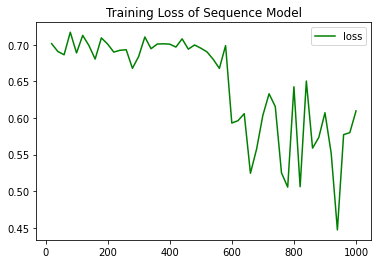

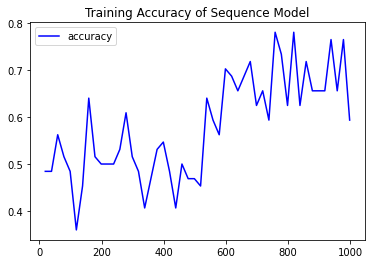

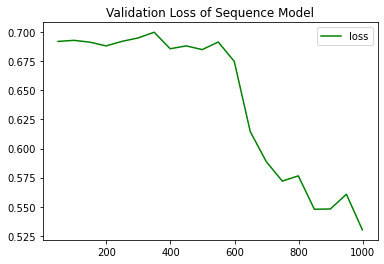

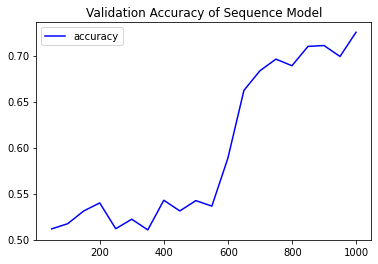

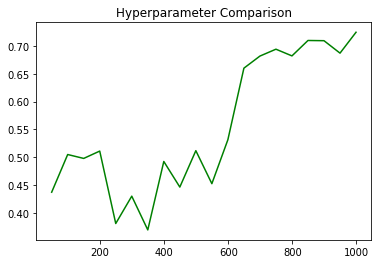

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
validation_epochs = []
f1_validation_list = []
for epoch in range(total_epoch_of_seq):
  #prepare input
  input_batch_of_seq, target_batch_of_seq = generate_seq_batch(train_seq_embeddings, sentiments_train_n, seq_batch_size)
  input_batch_torch_of_seq = torch.from_numpy(np.array(input_batch_of_seq)).float().to(device)
  target_batch_torch_of_seq = torch.from_numpy(np.array(target_batch_of_seq)).view(-1).to(device)
 
  #train the sequence model
  sequenceModel.train()
  outputs_of_seq,_ = sequenceModel(input_batch_torch_of_seq) 
  loss_of_seq = criterion_of_seq_model(outputs_of_seq, target_batch_torch_of_seq)
  loss_of_seq.backward()
  optimizer_of_seq.step()
  optimizer_of_seq.zero_grad()
  
  sequenceModel.eval()
  outputs_of_seq,_ = sequenceModel(input_batch_torch_of_seq) 

  if epoch % seq_shown_interval == seq_shown_interval - 1:
    loss_of_seq = criterion_of_seq_model(outputs_of_seq, target_batch_torch_of_seq)
    _, predicted_of_seq = torch.max(outputs_of_seq, 1) 
    train_acc= accuracy_score(predicted_of_seq.cpu().numpy(),target_batch_torch_of_seq.cpu().numpy())
    seq_epochs.append(epoch)
    seq_loss_list.append(loss_of_seq.item())
    seq_acc_list.append(train_acc)
    print('Epoch: %d, train loss: %.6f, train_acc: %.4f'%(epoch + 1, loss_of_seq.item(), train_acc))

  if epoch % validation_epoch_interval_1 == validation_epoch_interval_1 - 1:
    
    sum_validation_loss = 0
    sum_validation_accuracy = 0
    validation_predicted = torch.empty(total_validation)
    for each_batch in range(0, validation_batchs):
      input_batch_torch_of_validation = torch.from_numpy(np.array(test_seq_embeddings[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))])).float().to(device)
      target_batch_torch_of_validation = torch.from_numpy(sentiments_test_n[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))]).to(device)
      
      # from_batch_index = (total_validation/validation_batchs) * each_batch
      # to_batch_index = (total_validation/validation_batchs) * (each_batch + 1)

      validation_outputs,_  = sequenceModel(input_batch_torch_of_validation)     
      validation_loss = criterion_of_seq_model(validation_outputs, target_batch_torch_of_validation)   
      _, predicted_validation = torch.max(validation_outputs, 1)    
      validation_accuracy = accuracy_score(predicted_validation.cpu().numpy(), target_batch_torch_of_validation.cpu().numpy())
      validation_predicted[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))] = predicted_validation
     
      sum_validation_loss += validation_loss.item()
      sum_validation_accuracy += validation_accuracy
      
    validation_loss_list.append(sum_validation_loss/validation_batchs)
    validation_accuracy_list.append(sum_validation_accuracy/validation_batchs)
      
    f1_validation_score = f1_score(np.array(sentiments_test_n), validation_predicted.cpu().numpy(), average='weighted') 
    validation_epochs.append(epoch)
    f1_validation_list.append(f1_validation_score)
   

print('Finished Sequence Model Training')
import matplotlib
import matplotlib.pyplot as plt
plt.plot(seq_epochs, seq_loss_list, 'g', label = 'loss')
plt.title('Training Loss of Sequence Model')
plt.legend()
plt.figure()

plt.plot(seq_epochs, seq_acc_list, 'b', label = 'accuracy')
plt.title('Training Accuracy of Sequence Model')
plt.legend()
plt.show()

plt.plot(validation_epochs, validation_loss_list, 'g', label = 'loss')
plt.title('Validation Loss of Sequence Model')
plt.legend()
plt.figure()

plt.plot(validation_epochs, validation_accuracy_list, 'b', label = 'accuracy')
plt.title('Validation Accuracy of Sequence Model')
plt.legend()
plt.show()

# Sequence Model 2
plt.plot(validation_epochs, f1_validation_list, 'g', label = 'Hyperparameter 1')
plt.title('Hyperparameter Comparison')
plt.show()

**Sequence Model 1**  </br>
File name: Sequence_model_1.pt</br>
Model used: LSTM </br>
Hyperparameters selection:  </br>

```
seq_n_input = 200
seq_n_class = 2
seq_n_hidden = 128
seq_batch_size = 32
total_epoch_of_seq = 2000
seq_learning_rate = 0.01
seq_shown_interval = 20

validation_epoch_interval_1 = 50
total_validation = 25000
validation_batchs = 500
```
Performance: Not good, Loss does not converge



In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
validation_epochs = []
f1_validation_list = []
for epoch in range(total_epoch_of_seq):
  #prepare input
  input_batch_of_seq, target_batch_of_seq = generate_seq_batch(train_seq_embeddings, sentiments_train_n, seq_batch_size)
  input_batch_torch_of_seq = torch.from_numpy(np.array(input_batch_of_seq)).float().to(device)
  target_batch_torch_of_seq = torch.from_numpy(np.array(target_batch_of_seq)).view(-1).to(device)
 
  #train the sequence model
  sequenceModel.train()
  outputs_of_seq,_ = sequenceModel(input_batch_torch_of_seq) 
  loss_of_seq = criterion_of_seq_model(outputs_of_seq, target_batch_torch_of_seq)
  loss_of_seq.backward()
  optimizer_of_seq.step()
  optimizer_of_seq.zero_grad()
  
  sequenceModel.eval()
  outputs_of_seq,_ = sequenceModel(input_batch_torch_of_seq) 

  if epoch % seq_shown_interval == seq_shown_interval - 1:
    loss_of_seq = criterion_of_seq_model(outputs_of_seq, target_batch_torch_of_seq)
    _, predicted_of_seq = torch.max(outputs_of_seq, 1) 
    train_acc= accuracy_score(predicted_of_seq.cpu().numpy(),target_batch_torch_of_seq.cpu().numpy())
    seq_epochs.append(epoch)
    seq_loss_list.append(loss_of_seq.item())
    seq_acc_list.append(train_acc)
    print('Epoch: %d, train loss: %.6f, train_acc: %.4f'%(epoch + 1, loss_of_seq.item(), train_acc))

  if epoch % validation_epoch_interval_1 == validation_epoch_interval_1 - 1:
    
    sum_validation_loss = 0
    sum_validation_accuracy = 0
    validation_predicted = torch.empty(total_validation)
    for each_batch in range(0, validation_batchs):
      input_batch_torch_of_validation = torch.from_numpy(np.array(test_seq_embeddings[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))])).float().to(device)
      target_batch_torch_of_validation = torch.from_numpy(sentiments_test_n[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))]).to(device)
      
      # from_batch_index = (total_validation/validation_batchs) * each_batch
      # to_batch_index = (total_validation/validation_batchs) * (each_batch + 1)

      validation_outputs,_  = sequenceModel(input_batch_torch_of_validation)     
      validation_loss = criterion_of_seq_model(validation_outputs, target_batch_torch_of_validation)   
      _, predicted_validation = torch.max(validation_outputs, 1)    
      validation_accuracy = accuracy_score(predicted_validation.cpu().numpy(), target_batch_torch_of_validation.cpu().numpy())
      validation_predicted[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))] = predicted_validation
     
      sum_validation_loss += validation_loss.item()
      sum_validation_accuracy += validation_accuracy
      
    validation_loss_list.append(sum_validation_loss/validation_batchs)
    validation_accuracy_list.append(sum_validation_accuracy/validation_batchs)
      
    f1_validation_score = f1_score(np.array(sentiments_test_n), validation_predicted.cpu().numpy(), average='weighted') 
    validation_epochs.append(epoch)
    f1_validation_list.append(f1_validation_score)
   

print('Finished Sequence Model Training')

Epoch: 20, train loss: 0.692259, train_acc: 0.5625
Epoch: 40, train loss: 0.691902, train_acc: 0.5312
Epoch: 60, train loss: 0.698900, train_acc: 0.3750
Epoch: 80, train loss: 0.693456, train_acc: 0.4375
Epoch: 100, train loss: 0.694900, train_acc: 0.4688
Epoch: 120, train loss: 0.694198, train_acc: 0.5312
Epoch: 140, train loss: 0.690863, train_acc: 0.6250
Epoch: 160, train loss: 0.697398, train_acc: 0.3438
Epoch: 180, train loss: 0.692085, train_acc: 0.4688
Epoch: 200, train loss: 0.690776, train_acc: 0.5625
Epoch: 220, train loss: 0.694586, train_acc: 0.4375
Epoch: 240, train loss: 0.694318, train_acc: 0.5000
Epoch: 260, train loss: 0.696697, train_acc: 0.4688
Epoch: 280, train loss: 0.686187, train_acc: 0.6250
Epoch: 300, train loss: 0.690624, train_acc: 0.5312
Epoch: 320, train loss: 0.687347, train_acc: 0.5625
Epoch: 340, train loss: 0.678182, train_acc: 0.5938
Epoch: 360, train loss: 0.690580, train_acc: 0.5938
Epoch: 380, train loss: 0.684191, train_acc: 0.6250
Epoch: 400, trai

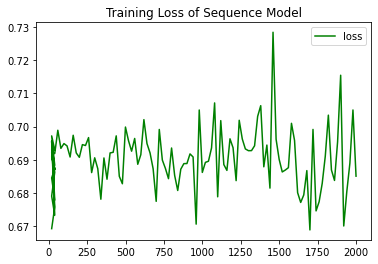

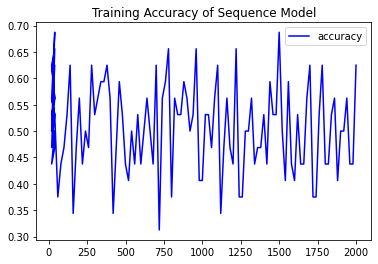

In [0]:
# The loss and accuracy values both not improved
plt.plot(seq_epochs, seq_loss_list, 'g', label = 'loss')
plt.title('Training Loss of Sequence Model')
plt.legend()
plt.figure()

plt.plot(seq_epochs, seq_acc_list, 'b', label = 'accuracy')
plt.title('Training Accuracy of Sequence Model')
plt.legend()
plt.show()

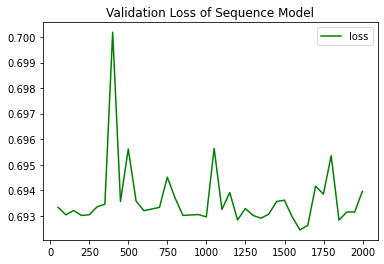

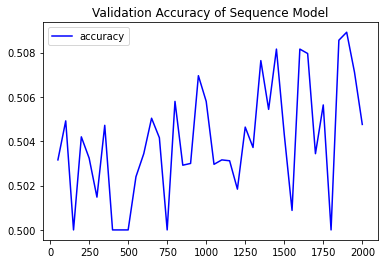

In [0]:
# The loss and accuracy values both not improved
plt.plot(validation_epochs, validation_loss_list, 'g', label = 'loss')
plt.title('Validation Loss of Sequence Model')
plt.legend()
plt.figure()

plt.plot(validation_epochs, validation_accuracy_list, 'b', label = 'accuracy')
plt.title('Validation Accuracy of Sequence Model')
plt.legend()
plt.show()

**Sequence Model 2**  </br>
File name: Sequence_model_2.pt</br>
Model used: LSTM </br>
Hyperparameters selection:  </br>

```
seq_n_hidden = 128
seq_batch_size = 32
total_epoch_of_seq = 1000
seq_learning_rate = 0.001
seq_shown_interval = 20
```
Performance: Not good, loss does not converge.

In [0]:
import matplotlib
import matplotlib.pyplot as plt

seq_n_input = train_seq_embeddings.shape[2] #200

seq_n_class = len(set(labels))  #2

seq_n_hidden = 128
seq_batch_size = 32
total_epoch_of_seq = 1000
seq_learning_rate = 0.001
seq_shown_interval = 20 
validation_epoch_interval_1 = 50
total_validation = 25000
validation_batchs = 5000
seq_epochs = []
seq_loss_list = []
seq_acc_list = []
validation_loss_list = []
validation_accuracy_list = []



In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
validation_epochs = []
f1_validation_list = []
for epoch in range(total_epoch_of_seq):
  #prepare input
  input_batch_of_seq, target_batch_of_seq = generate_seq_batch(train_seq_embeddings, sentiments_train_n, seq_batch_size)
  input_batch_torch_of_seq = torch.from_numpy(np.array(input_batch_of_seq)).float().to(device)
  target_batch_torch_of_seq = torch.from_numpy(np.array(target_batch_of_seq)).view(-1).to(device)
 
  #train the sequence model
  sequenceModel.train()
  outputs_of_seq,_ = sequenceModel(input_batch_torch_of_seq) 
  loss_of_seq = criterion_of_seq_model(outputs_of_seq, target_batch_torch_of_seq)
  loss_of_seq.backward()
  optimizer_of_seq.step()
  optimizer_of_seq.zero_grad()
  
  sequenceModel.eval()
  outputs_of_seq,_ = sequenceModel(input_batch_torch_of_seq) 

  if epoch % seq_shown_interval == seq_shown_interval - 1:
    loss_of_seq = criterion_of_seq_model(outputs_of_seq, target_batch_torch_of_seq)
    _, predicted_of_seq = torch.max(outputs_of_seq, 1) 
    train_acc= accuracy_score(predicted_of_seq.cpu().numpy(),target_batch_torch_of_seq.cpu().numpy())
    seq_epochs.append(epoch)
    seq_loss_list.append(loss_of_seq.item())
    seq_acc_list.append(train_acc)
    print('Epoch: %d, train loss: %.6f, train_acc: %.4f'%(epoch + 1, loss_of_seq.item(), train_acc))

  if epoch % validation_epoch_interval_1 == validation_epoch_interval_1 - 1:
    
    sum_validation_loss = 0
    sum_validation_accuracy = 0
    validation_predicted = torch.empty(total_validation)
    for each_batch in range(0, validation_batchs):
      input_batch_torch_of_validation = torch.from_numpy(np.array(test_seq_embeddings[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))])).float().to(device)
      target_batch_torch_of_validation = torch.from_numpy(sentiments_test_n[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))]).to(device)
      
      # from_batch_index = (total_validation/validation_batchs) * each_batch
      # to_batch_index = (total_validation/validation_batchs) * (each_batch + 1)

      validation_outputs,_  = sequenceModel(input_batch_torch_of_validation)     
      validation_loss = criterion_of_seq_model(validation_outputs, target_batch_torch_of_validation)   
      _, predicted_validation = torch.max(validation_outputs, 1)    
      validation_accuracy = accuracy_score(predicted_validation.cpu().numpy(), target_batch_torch_of_validation.cpu().numpy())
      validation_predicted[int((total_validation/validation_batchs) * each_batch) : int((total_validation/validation_batchs) * (each_batch + 1))] = predicted_validation
     
      sum_validation_loss += validation_loss.item()
      sum_validation_accuracy += validation_accuracy
      
    validation_loss_list.append(sum_validation_loss/validation_batchs)
    validation_accuracy_list.append(sum_validation_accuracy/validation_batchs)
      
    f1_validation_score = f1_score(np.array(sentiments_test_n), validation_predicted.cpu().numpy(), average='weighted') 
    validation_epochs.append(epoch)
    f1_validation_list.append(f1_validation_score)
   

print('Finished Sequence Model Training')

Epoch: 20, train loss: 0.690290, train_acc: 0.5312
Epoch: 40, train loss: 0.677966, train_acc: 0.6250
Epoch: 60, train loss: 0.693743, train_acc: 0.5000
Epoch: 80, train loss: 0.690692, train_acc: 0.4688
Epoch: 100, train loss: 0.680023, train_acc: 0.6250
Epoch: 120, train loss: 0.696302, train_acc: 0.3438
Epoch: 140, train loss: 0.693053, train_acc: 0.5000
Epoch: 160, train loss: 0.687267, train_acc: 0.5625
Epoch: 180, train loss: 0.661856, train_acc: 0.5938
Epoch: 200, train loss: 0.702719, train_acc: 0.3438
Epoch: 220, train loss: 0.702230, train_acc: 0.4688
Epoch: 240, train loss: 0.695653, train_acc: 0.5312
Epoch: 260, train loss: 0.697954, train_acc: 0.5000
Epoch: 280, train loss: 0.690484, train_acc: 0.5625
Epoch: 300, train loss: 0.694943, train_acc: 0.4375
Epoch: 320, train loss: 0.692676, train_acc: 0.5312
Epoch: 340, train loss: 0.692103, train_acc: 0.5625
Epoch: 360, train loss: 0.697869, train_acc: 0.3438
Epoch: 380, train loss: 0.692014, train_acc: 0.4688
Epoch: 400, trai

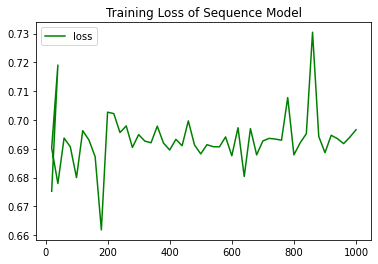

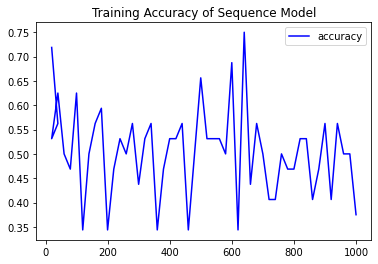

In [0]:
# The loss and accuracy values both not improved
plt.plot(seq_epochs, seq_loss_list, 'g', label = 'loss')
plt.title('Training Loss of Sequence Model')
plt.legend()
plt.figure()

plt.plot(seq_epochs, seq_acc_list, 'b', label = 'accuracy')
plt.title('Training Accuracy of Sequence Model')
plt.legend()
plt.show()

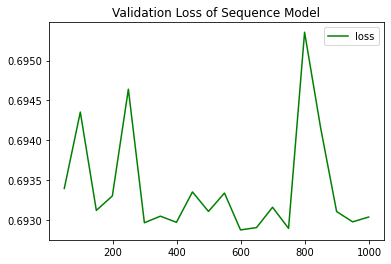

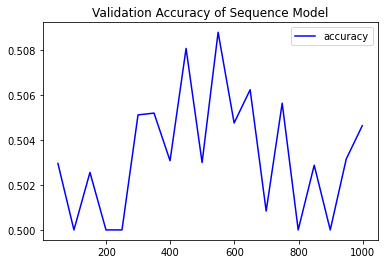

In [0]:
# The loss and accuracy values both not improved
plt.plot(validation_epochs, validation_loss_list, 'g', label = 'loss')
plt.title('Validation Loss of Sequence Model')
plt.legend()
plt.figure()

plt.plot(validation_epochs, validation_accuracy_list, 'b', label = 'accuracy')
plt.title('Validation Accuracy of Sequence Model')
plt.legend()
plt.show()

### 2.3.4. Save Sequence Model

In [30]:
# Please comment your code
torch.save(sequenceModel, 'Sequence_model.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type SequenceModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### 2.3.5. Load Sequence Model

In [0]:
# Please comment your code
sequence_model = torch.load('Sequence_model.pt')
sequence_model.eval()

SequenceModel(
  (lstm): LSTM(200, 128, batch_first=True)
  (linear): Linear(in_features=128, out_features=2, bias=True)
)

# 3 - Evaluation

(*Please show your empirical evidence*)

## 3.1. Performance Evaluation
**Sequence Model: Best performance.**
The accuracy, recall and f1 score are shown as the following table.

In [0]:
total_tests = 25000
test_batchs = 500

In [32]:
test_predicted = torch.empty(total_tests)
for each_batch in range(0, test_batchs):
  from_batch_index = int((total_tests/test_batchs) * each_batch)
  to_batch_index = int((total_tests/test_batchs) * (each_batch + 1))
  
  input_batch_torch_of_test = torch.from_numpy(np.array(test_seq_embeddings[from_batch_index : to_batch_index])).float().to(device)
  target_batch_torch_of_test = torch.from_numpy(sentiments_test_n[from_batch_index : to_batch_index]).to(device)
  
  test_outputs,_ = sequenceModel(input_batch_torch_of_test) 
  _, predicted_test = torch.max(test_outputs, 1)
  test_predicted[from_batch_index : to_batch_index] = predicted_test
from sklearn.metrics import f1_score
f1 = f1_score(np.array(sentiments_test_n), test_predicted.cpu().numpy(), average='weighted')
# send it to cpu 
# f1score = f1_score(np.array(sentiments_test_n), predicted_test.cpu().numpy(), average='weighted')

from sklearn.metrics import classification_report
print(classification_report(np.array(sentiments_test_n), test_predicted.cpu().numpy(), digits=4))
# print('F1-Score: %.4f' % f1score)

              precision    recall  f1-score   support

           0     0.7492    0.6772    0.7114     12500
           1     0.7055    0.7734    0.7379     12500

    accuracy                         0.7253     25000
   macro avg     0.7274    0.7253    0.7246     25000
weighted avg     0.7274    0.7253    0.7246     25000



**Evaluation result of Sequence Model 2:**

The accuracy, precision, recall and f1 score are shown in the following table. The totally performance is not good. I tried to use Bi-LSTM to replace the LSTM, it works much better.

In [0]:
test_predicted = torch.empty(total_tests)
for each_batch in range(0, test_batchs):
  from_batch_index = int((total_tests/test_batchs) * each_batch)
  to_batch_index = int((total_tests/test_batchs) * (each_batch + 1))
  
  input_batch_torch_of_test = torch.from_numpy(np.array(test_seq_embeddings[from_batch_index : to_batch_index])).float().to(device)
  target_batch_torch_of_test = torch.from_numpy(sentiments_test_n[from_batch_index : to_batch_index]).to(device)
  
  test_outputs,_ = sequenceModel(input_batch_torch_of_test) 
  _, predicted_test = torch.max(test_outputs, 1)
  test_predicted[from_batch_index : to_batch_index] = predicted_test
from sklearn.metrics import f1_score
f1 = f1_score(np.array(sentiments_test_n), test_predicted.cpu().numpy(), average='weighted')
# send it to cpu 
# f1score = f1_score(np.array(sentiments_test_n), predicted_test.cpu().numpy(), average='weighted')

from sklearn.metrics import classification_report
print(classification_report(np.array(sentiments_test_n), test_predicted.cpu().numpy(), digits=4))
# print('F1-Score: %.4f' % f1score)

              precision    recall  f1-score   support

           0     0.5028    0.8302    0.6263     12500
           1     0.5133    0.1790    0.2655     12500

    accuracy                         0.5046     25000
   macro avg     0.5081    0.5046    0.4459     25000
weighted avg     0.5081    0.5046    0.4459     25000



In [0]:
total_tests = 25000
test_batchs = 5000

In [0]:
total_tests = len(sentiments_test_n)
test_batchs = 100

In [0]:
plt.plot(validation_epochs, f1_validation_list, 'g', label = 'Hyperparameter 1')
plt.title('Hyperparameter Comparison')
plt.show()

## 3.2. Hyperparameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.*

The graph for the best model is shown under this code. Much better than model 2.

Graph for sequence model 2. The f1 score keeps jumpping up and down. Model 2 is not an efficient model to predict the negative or positive reviews. In this graph, the epoch 850 gains the highest f1 score.

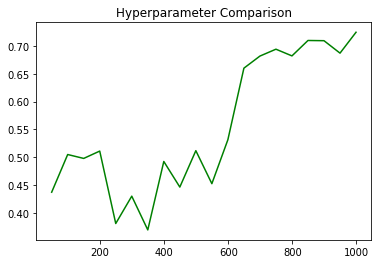

In [33]:
# Sequence Model
plt.plot(validation_epochs, f1_validation_list, 'g', label = 'Hyperparameter 1')
plt.title('Hyperparameter Comparison')
plt.show()

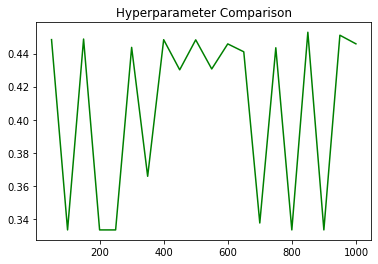

In [0]:
# Sequence Model 2
plt.plot(validation_epochs, f1_validation_list, 'g', label = 'Hyperparameter 1')
plt.title('Hyperparameter Comparison')
plt.show()

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [0]:
print("Thank you.")